In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
!wget --no-check-certificate \
  https://bits.avcdn.net/productfamily_ANTIVIRUS/insttype_FREE/platform_WIN/installertype_FULL/build_RELEASE/cookie_mmm_ava_999_999_a4j_m \
  -O /content/drive/'My Drive'/lov.zip

--2020-10-23 07:41:24--  https://bits.avcdn.net/productfamily_ANTIVIRUS/insttype_FREE/platform_WIN/installertype_FULL/build_RELEASE/cookie_mmm_ava_999_999_a4j_m
Resolving bits.avcdn.net (bits.avcdn.net)... 104.114.161.102, 2600:1407:d800:180::240d, 2600:1407:d800:187::240d
Connecting to bits.avcdn.net (bits.avcdn.net)|104.114.161.102|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 500081112 (477M) [application/octet-stream]
Saving to: ‘/content/drive/My Drive/lov.zip’

/content/drive/My D 100%[===================>] 476.91M  51.8MB/s    in 11s     

2020-10-23 07:41:36 (42.4 MB/s) - ‘/content/drive/My Drive/lov.zip’ saved [500081112/500081112]



In [ ]:
import zipfile,os
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()
!wget-nocertificate

In [ ]:
os.listdir('/tmp/rockpaperscissors')

['paper', 'rps-cv-images', 'rock', 'README_rpc-cv-images.txt', 'scissors']

In [ ]:
!pip install split-folders

In [ ]:
import split_folders

split_folders.ratio('/tmp/rockpaperscissors/rps-cv-images', output="/tmp/data", seed=1337, ratio=(.8, .2))

Copying files: 2188 files [00:00, 4686.16 files/s]


In [ ]:
base_dir = '/tmp/data'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')
train_paper_dir = os.path.join(train_dir, 'paper')
train_rock_dir = os.path.join(train_dir, 'rock')
train_scissors_dir = os.path.join(train_dir, 'scissors')
validation_paper_dir = os.path.join(validation_dir, 'paper')
validation_rock_dir = os.path.join(validation_dir, 'rock')
validation_scissors_dir = os.path.join(validation_dir, 'scissors')

print('total data training gambar kertas: ', len(os.listdir(train_paper_dir)))
print('total data training gambar batu: ', len(os.listdir(train_rock_dir)))
print('total data training gambar gunting: ', len(os.listdir(train_scissors_dir)))
print('total data validasi gambar kertas: ', len(os.listdir(validation_paper_dir)))
print('total data validasi gambar batu: ', len(os.listdir(validation_rock_dir)))
print('total data validasi gambar gunting: ', len(os.listdir(validation_scissors_dir)))

total data training gambar kertas:  569
total data training gambar batu:  580
total data training gambar gunting:  600
total data validasi gambar kertas:  143
total data validasi gambar batu:  146
total data validasi gambar gunting:  150


In [ ]:
train_datagen = ImageDataGenerator(
        rescale = 1./255,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')
test_datagen = ImageDataGenerator(
        rescale = 1./255,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

In [ ]:
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=126,
        class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=126,
        class_mode='categorical')

Found 1749 images belonging to 3 classes.
Found 439 images belonging to 3 classes.


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [ ]:
model.compile(loss='categorical_crossentropy',
              metrics=['accuracy'],
              optimizer='rmsprop',)

In [ ]:
history = model.fit(
      train_generator,
      steps_per_epoch=20,
      epochs=20,
      validation_data = validation_generator,
      validation_steps=5,
      verbose=1)

Epoch 1/20
20/20 [==============================] - 21s 1s/step - loss: 1.2008 - accuracy: 0.3597 - val_loss: 1.0749 - val_accuracy: 0.4301
Epoch 2/20
20/20 [==============================] - 21s 1s/step - loss: 1.1052 - accuracy: 0.3880 - val_loss: 1.0636 - val_accuracy: 0.3381
Epoch 3/20
20/20 [==============================] - 21s 1s/step - loss: 1.0624 - accuracy: 0.5032 - val_loss: 0.8617 - val_accuracy: 0.6319
Epoch 4/20
20/20 [==============================] - 20s 1s/step - loss: 0.8967 - accuracy: 0.5896 - val_loss: 0.8979 - val_accuracy: 0.5080
Epoch 5/20
20/20 [==============================] - 21s 1s/step - loss: 0.8094 - accuracy: 0.6851 - val_loss: 0.8650 - val_accuracy: 0.6106
Epoch 6/20
20/20 [==============================] - 20s 1s/step - loss: 0.6563 - accuracy: 0.7337 - val_loss: 0.5362 - val_accuracy: 0.7858
Epoch 7/20
20/20 [==============================] - 21s 1s/step - loss: 0.5708 - accuracy: 0.7723 - val_loss: 0.4631 - val_accuracy: 0.8124
Epoch 8/20
20/20 [==

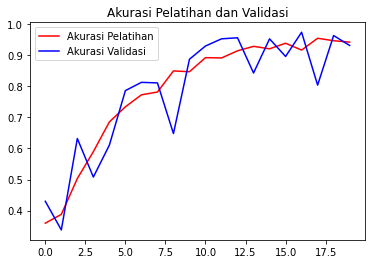

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Akurasi Pelatihan')
plt.plot(epochs, val_acc, 'b', label='Akurasi Validasi')
plt.title('Akurasi Pelatihan dan Validasi')
plt.legend(loc=0)
plt.figure()

plt.show()

Saving yxZyXGFCtnDwavIo.png to yxZyXGFCtnDwavIo.png
yxZyXGFCtnDwavIo.png
[[0. 1. 0.]]


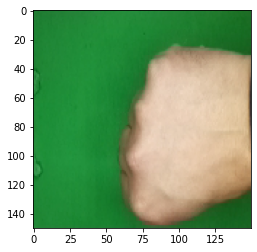

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)
  print(classes)